In [ ]:
# Import the required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Check for file location
import os
print(os.getcwd())

c:\python_VSC\GUVI_Projects\Project_Clickstream_Conversion\notebook


In [ ]:
# Read the train_data.csv from the data folder
df = pd.read_csv(r"../data/train_data.csv")

In [ ]:
# Perform feature engineering
df['purchase_completed'] = df.apply(lambda row: 1 if (row['page'] == 5 and row['price'] > 0 and row['order'] > 10) else 0, axis=1)
df['is_weekend'] = df['day'].apply(lambda x: 1 if x in [6, 7] else 0)
df['total_clicks'] = df.groupby('session_id')['order'].transform('count')
df['max_page_reached'] = df.groupby('session_id')['page'].transform('max')
df['season'] = df['month'].apply(lambda x: 'Summer' if x in [4, 5, 6] else 'Autumn')

In [ ]:
# Loaf the encoded mappings .pkl file for encoding the data
import pickle

# Load the .pkl file
with open("../support/classification_encoded_mappings.pkl", "rb") as file:
    encoded_mappings = pickle.load(file)

In [8]:
# Columns to exclude from encoding
exclude_columns = ["page2_clothing_model", "page", "price_2", "season"]

# Encode only the required columns
for col, mapping in encoded_mappings.items():
    if col in df.columns and col not in exclude_columns:
        df[col] = df[col].map(mapping) 

In [9]:
# Define the mapping for 'page1_main_category'
page1_main_category_mapping = {1: 'trousers', 2: 'skirts', 3: 'blouses', 4: 'sale'}

# Apply the mapping only to 'page1_main_category' column
if 'page1_main_category' in df.columns:
    df['page1_main_category'] = df['page1_main_category'].map(page1_main_category_mapping)

In [10]:
df.head(2)

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page,purchase_completed,is_weekend,total_clicks,max_page_reached,season
0,2008,6,22,21,Poland,15648,blouses,C20,violet,top left,profile,48,1,2,0,0,84,4,Summer
1,2008,5,19,6,Poland,10018,skirts,B26,violet,top right,en face,57,1,2,0,0,9,2,Summer


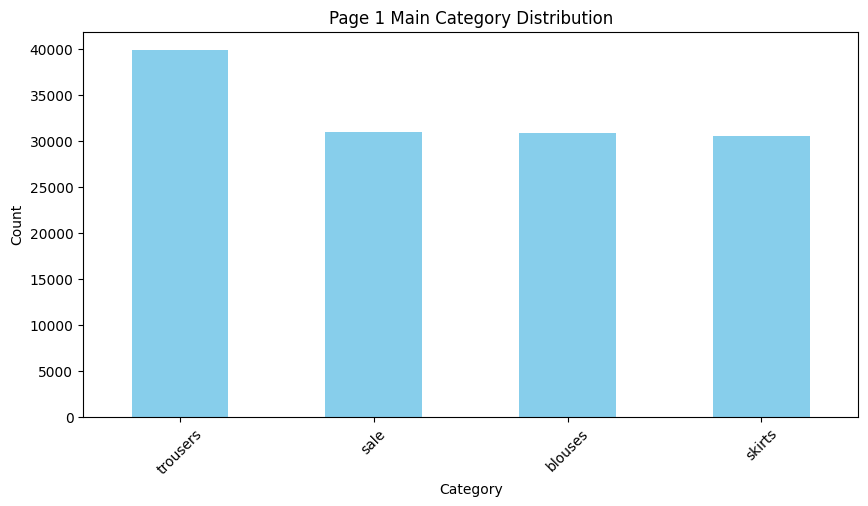

In [ ]:
# Visualization 1

plt.figure(figsize=(10, 5))
df['page1_main_category'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Page 1 Main Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

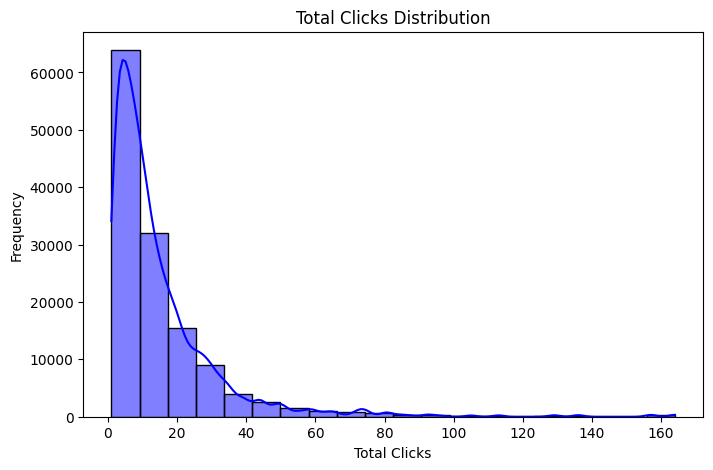

In [ ]:
# Visualization 2

plt.figure(figsize=(8, 5))
sns.histplot(df['total_clicks'], bins=20, kde=True, color='blue')
plt.title("Total Clicks Distribution")
plt.xlabel("Total Clicks")
plt.ylabel("Frequency")
plt.show()

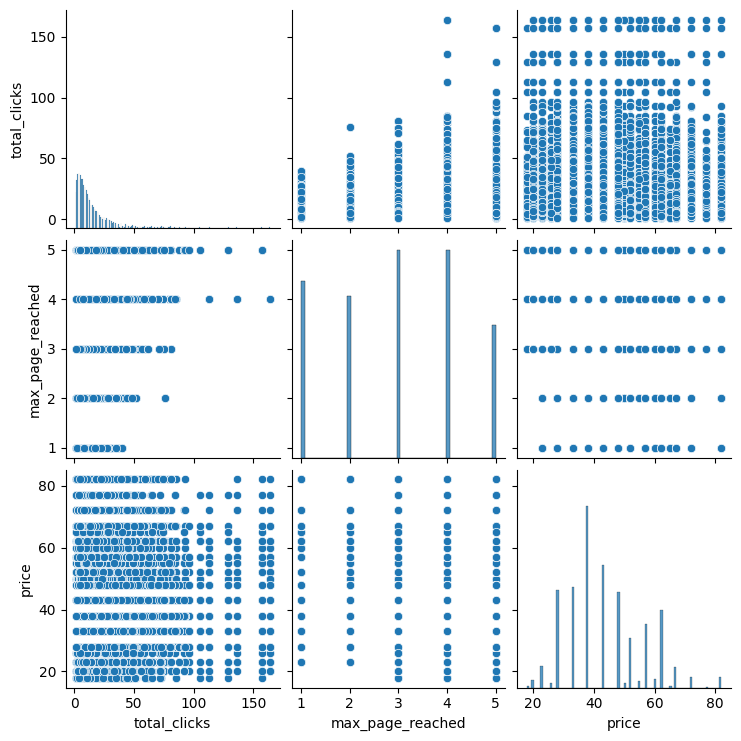

In [ ]:
# Visualization 3

selected_columns = ['total_clicks', 'max_page_reached', 'price']
sns.pairplot(df[selected_columns])
plt.show()

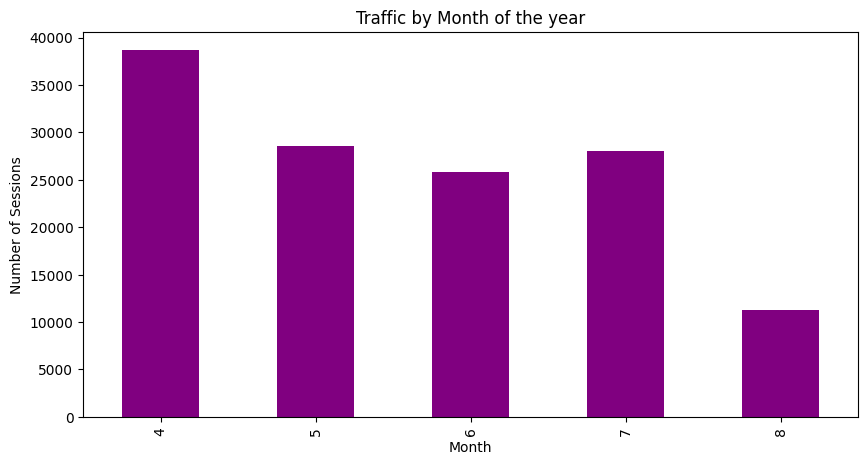

In [ ]:
# Visualization 4

if 'month' in df.columns:
    plt.figure(figsize=(10, 5))
    df['month'].value_counts().sort_index().plot(kind='bar', color='purple')
    plt.title("Traffic by Month of the year")
    plt.xlabel("Month")
    plt.ylabel("Number of Sessions")
    plt.show()

C:\Users\aswin\AppData\Local\Temp\ipykernel_13436\1506770618.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['purchase_completed'], palette="viridis")


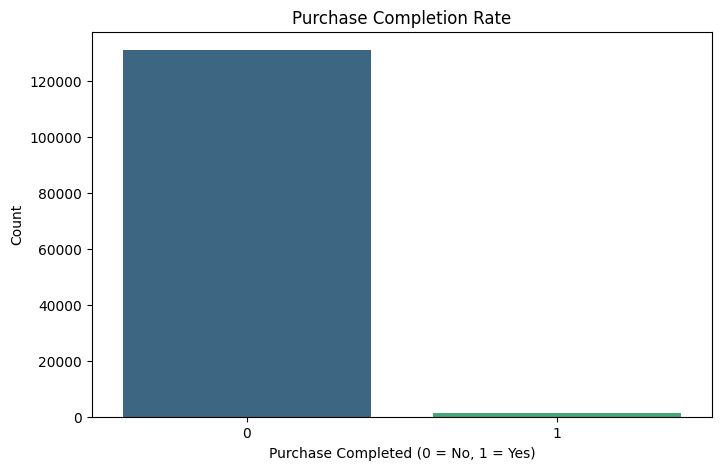

In [ ]:
# Visualization 5

plt.figure(figsize=(8, 5))
sns.countplot(x=df['purchase_completed'], palette="viridis")
plt.title("Purchase Completion Rate")
plt.xlabel("Purchase Completed (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

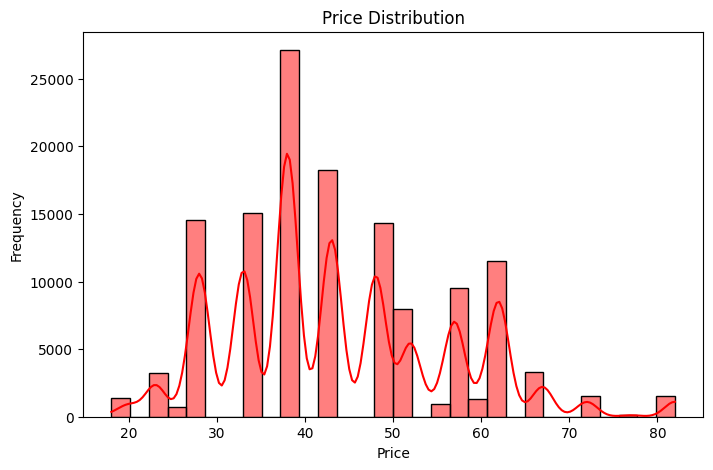

In [ ]:
# Visualization 6

plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True, color='red')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

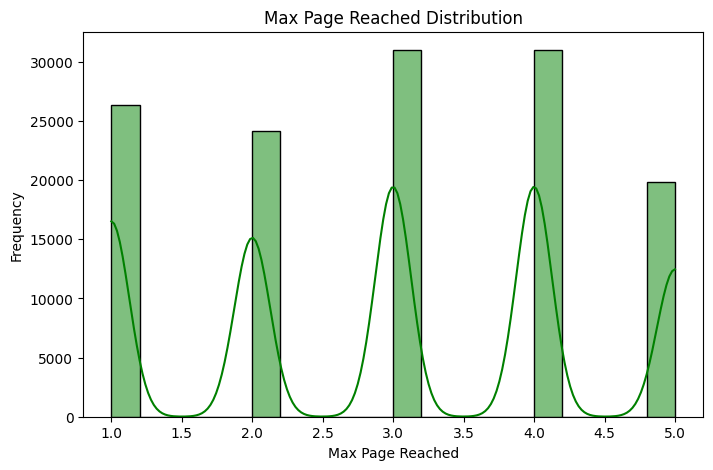

In [ ]:
# Visualization 7

plt.figure(figsize=(8, 5))
sns.histplot(df['max_page_reached'], bins=20, kde=True, color='green')
plt.title("Max Page Reached Distribution")
plt.xlabel("Max Page Reached")
plt.ylabel("Frequency")
plt.show()

C:\Users\aswin\AppData\Local\Temp\ipykernel_13436\3742972664.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['page1_main_category'], y=df['total_clicks'], palette="coolwarm")


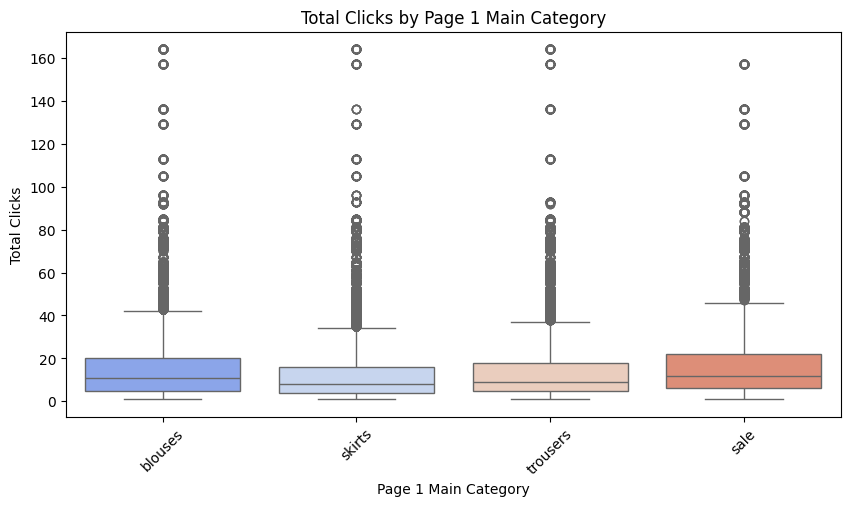

In [ ]:
# Visualization 8

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['page1_main_category'], y=df['total_clicks'], palette="coolwarm")
plt.title("Total Clicks by Page 1 Main Category")
plt.xlabel("Page 1 Main Category")
plt.ylabel("Total Clicks")
plt.xticks(rotation=45)
plt.show()

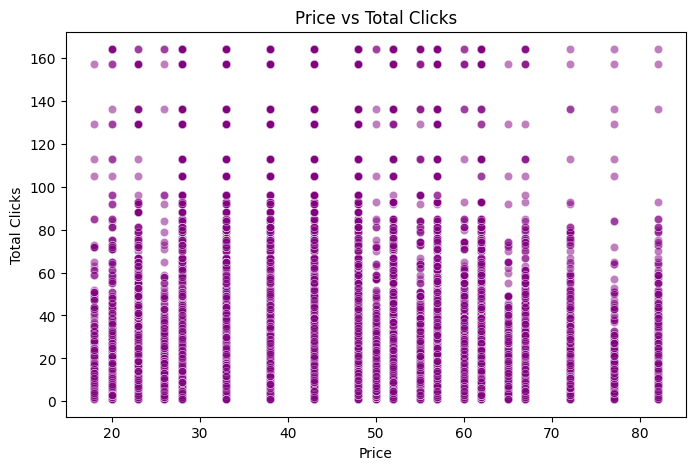

In [ ]:
# Visualization 9

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['price'], y=df['total_clicks'], alpha=0.5, color='purple')
plt.title("Price vs Total Clicks")
plt.xlabel("Price")
plt.ylabel("Total Clicks")
plt.show()